<a href="https://colab.research.google.com/github/yorkjong/vistock/blob/main/notebooks/profile_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualize stocks of profile charts (e.g., Volume Profile, Turnover Profile)
- Volume Profile also called Price by Volume, PBV
- Turnover means Trading Value (= price * volume)

### Install Required Packages

In [1]:
%pip install git+https://github.com/yorkjong/vistock.git

  Cloning https://github.com/yorkjong/vistock.git to /tmp/pip-req-build-qa42p2e8
  Running command git clone --filter=blob:none --quiet https://github.com/yorkjong/vistock.git /tmp/pip-req-build-qa42p2e8
  Resolved https://github.com/yorkjong/vistock.git to commit 63381aa05f25aee6e0264b0e41c863f8b36d0637
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.0 MB/s eta 0:00:00
  Created wheel for vistock: filename=vistock-0.4.1-py3-none-any.whl size=57121 sha256=c8f2dcb93aae1cf52f8ba23aac8a0a0aff73b83b2e63362b410d7f8898d5ea0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-p94s82wf/wheels/1f/ff/6c/9ec0adab3f1af71ff9ba3e4eb52d0f3849d3a695b812dc509a
Successfully built vistock


### Usage Explanation

#### Parameters

kind (圖種類):
* To select a kind of from charts

symbol (股票代碼):
* The symbol of a stock (e.g., TSLA)
* This also suport some to crypto to USD pairs (e.g., BTC-USD, ETH-USD)

period (整張圖的繪製區間):
* the period of data to download

interval (每筆k線資料的間隔):
* the interval of an OHLC data item

legend_location（圖例說明匡的位置; for mplfinance version）:
* the loacation of the legend

total_bins（價量累積直方圖中價格區間分組數量; for Profile charts）:
* the total bins on a Price by Volume chart (so-called Volume Profile)

hides_nontrading（是否隱藏非交易的期間; for Plotly version）
* decide if hides non-trading time-periods.

hbar_align_on_right:
* decide if the price-by-volume bars align on right. True to set the starting position of the horizontal bars to the right; False the left.

#### Colab Forms
* Forms provide an easy way to parameterize code.
* Forms are Google Colab specific features extending from the original Jupyter Notebooks.
* After running a cell manually, it will auto-run if you change the selected value.


### Plot with mplfinance

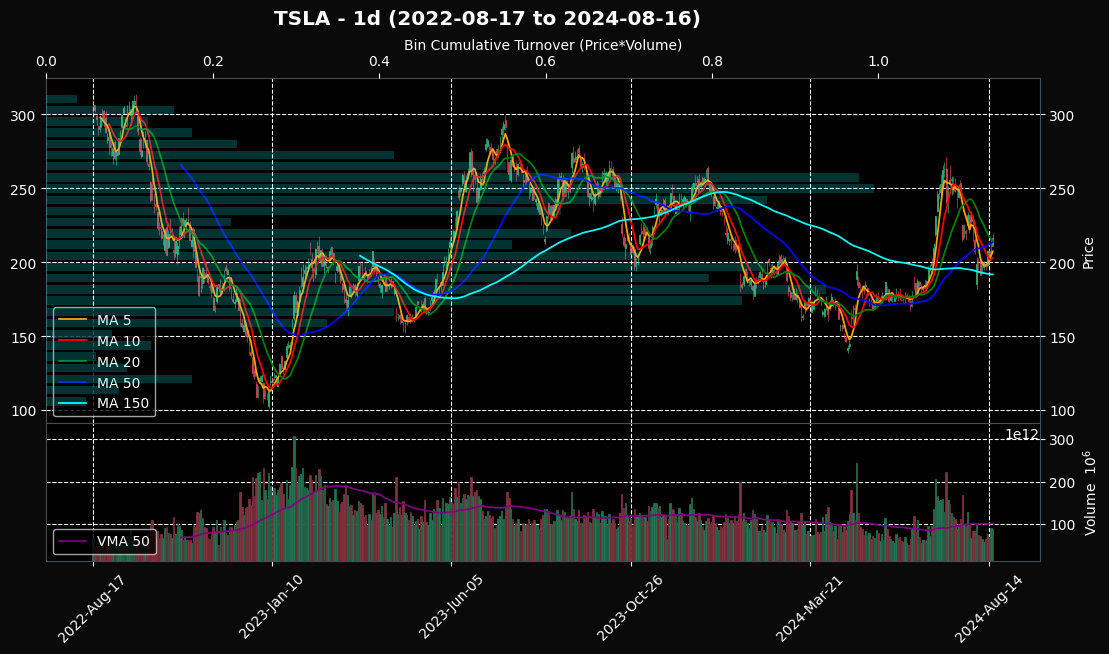

In [ ]:
# @title  { run: "auto", display-mode: "form" }
kind = "Turnover Profile" #@param ["Volume Profile", "Turnover Profile"]
symbol = "TSLA" #@param ["TSLA", "NVDA", "MSFT", "AAPL", "GOOG", "MSTR", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "2y" #@param ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval = '1d' #@param ['1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']
total_bins = 28 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}
legend_location = "lower left" #@param ["best", "upper right", "upper left", 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']
style = "binancedark" # @param ["yahoo","charles","tradingview","binance","binancedark","mike","nightclouds","checkers","ibd","sas","starsandstripes","kenan","blueskies","brasil"]
hides_nontrading = True # @param {"type":"boolean"}

from vistock.mpl import profile

tbl = {
    'Volume Profile': profile.Volume,
    'Turnover Profile': profile.Turnover,
}

module = tbl[kind]
module.plot(symbol, period=period, interval=interval, total_bins=total_bins,
            legend_loc=legend_location,
            style=style, hides_nontrading=hides_nontrading)


### Plot with Plotly

In [2]:
# @title 2-subplot version { run: "auto", display-mode: "form" }
kind = "Volume Profile" #@param ["Volume Profile", "Turnover Profile"]
symbol = "台積電" #@param ["TSLA", "NVDA", "MSFT", "AAPL", "GOOG", "MSTR", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "1y" #@param ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval = '1d' #@param ['1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']
total_bins = 42 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}
template = "simple_white" # @param ["plotly","plotly_white","plotly_dark","ggplot2","seaborn","simple_white","presentation","xgridoff","ygridoff"]
hbar_align_on_right = True #@param {type:"boolean"}
hides_nontrading = True #@param {type:"boolean"}

from vistock.plotly import prf2s

tbl = {
    'Volume Profile': prf2s.Volume,
    'Turnover Profile': prf2s.Turnover,
}

module = tbl[kind]
module.plot(symbol, period=period, interval=interval, total_bins=total_bins,
            hbar_align_on_right=hbar_align_on_right,
            hides_nontrading=hides_nontrading, template=template)


In [ ]:
# @title 4-subplot version { run: "auto", display-mode: "form" }
kind = "Turnover Profile" #@param ["Volume Profile", "Turnover Profile"]
symbol = "NVDA" #@param ["TSLA", "NVDA", "MSFT", "AAPL", "GOOG", "MSTR", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "1y" #@param ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval = '1d' #@param ['1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']
total_bins = 42 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}
hides_nontrading = True #@param {type:"boolean"}

from vistock.plotly import prf4s

tbl = {
    'Volume Profile': prf4s.Volume,
    'Turnover Profile': prf4s.Turnover,
}


module = tbl[kind]
module.plot(symbol, period=period, interval=interval, total_bins=total_bins,
            hides_nontrading=hides_nontrading)
